In [1]:
import cv2
import os
import random
import matplotlib.pyplot as plt
from pathlib import Path


Matplotlib is building the font cache; this may take a moment.


In [10]:
from pathlib import Path

def detect_class_ids(label_folder):
    class_ids = set()
    for label_file in Path(label_folder).glob("*.txt"):
        with open(label_file, 'r') as f:
            for line in f:
                if line.strip():
                    class_id = int(line.strip().split()[0])
                    class_ids.add(class_id)
    return sorted(list(class_ids))

# Use your actual label folder here
label_dir = Path("../data/images/train/labels")
detected_ids = detect_class_ids(label_dir)

print(f"Found class IDs: {detected_ids}")


Found class IDs: [0, 1, 2, 3, 4]


In [11]:
CLASS_NAMES = [f"class_{i}" for i in detected_ids]
print(CLASS_NAMES)


['class_0', 'class_1', 'class_2', 'class_3', 'class_4']


In [12]:
# Adjust to your actual class names
CLASS_NAMES = ['bicycle', 'bus', 'car', 'motorbike', 'person']

# Change these paths if needed
image_dir = Path("../data/images/train/images")
label_dir = Path("../data/images/train/labels")


In [13]:
def load_yolo_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    labels = []
    for line in lines:
        cls, x_center, y_center, width, height = map(float, line.strip().split())
        labels.append((int(cls), x_center, y_center, width, height))
    return labels


In [14]:
# draw boxes on images
def draw_boxes(image_path, label_path):
    image = cv2.imread(str(image_path))
    h, w = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    labels = load_yolo_labels(label_path)
    for cls, xc, yc, bw, bh in labels:
        x1 = int((xc - bw / 2) * w)
        y1 = int((yc - bh / 2) * h)
        x2 = int((xc + bw / 2) * w)
        y2 = int((yc + bh / 2) * h)

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, CLASS_NAMES[cls], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    return image


Showing: screenshot_16262_jpg.rf.e7d49625d05c6bb7c41d006024550250.jpg


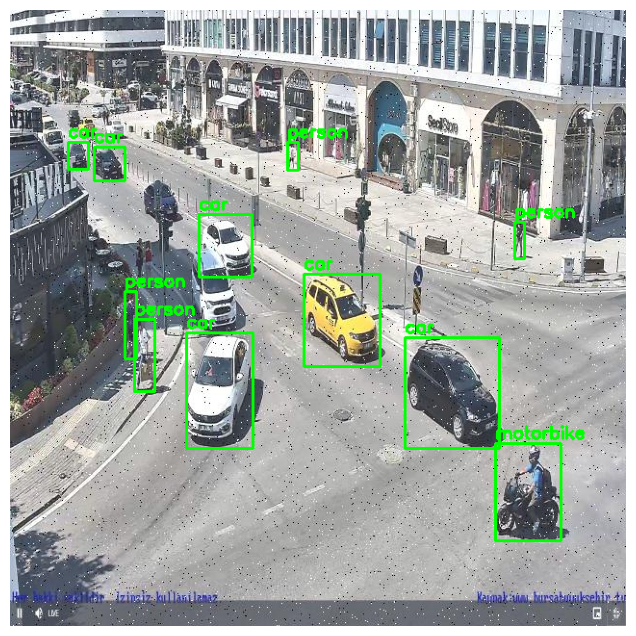

In [28]:
#Showing random samples
random_image = random.choice(list(image_dir.glob("*.jpg")))
corresponding_label = label_dir / (random_image.stem + ".txt")

print(f"Showing: {random_image.name}")
img_with_boxes = draw_boxes(random_image, corresponding_label)

plt.figure(figsize=(10, 8))
plt.imshow(img_with_boxes)
plt.axis("off")
plt.show()
